# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
car_data = pd.read_csv("./CarPrice_Assignment.csv")

In [3]:
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)

In [4]:
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.680,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.470,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.400,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.400,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.400,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.400,7.00,160,5500,16,22,17859.167


In [5]:
car_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [6]:
car_data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

- CarName and car_ID are not required for traing as these feature dont affect price of car
- fueltype, doornumber, carbody, drivewheel, enginlocation, engintype, cylindernumber, fuelsystem and aspiration need to be vectorize as its dtype is object and contain strings value
- Also drop price column as this will be labels


<h3>shuffling data</h3>

In [7]:
car_shuffle_data = car_data.sample(frac=1)

In [8]:
car_shuffle_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30,13950.000
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.100,8.30,155,4750,16,18,34184.000
121,122,1,plymouth satellite custom (sw),gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.230,9.40,68,5500,31,38,6692.000
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.100,8.30,155,4750,16,18,35056.000
10,11,2,bmw 320i,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.800,8.80,101,5800,23,29,16430.000
174,175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.350,22.50,73,4500,30,33,10698.000
94,95,1,nissan leaf,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1951,ohc,four,97,2bbl,3.15,3.290,9.40,69,5200,31,37,7299.000
162,163,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,166.3,64.4,52.8,2140,ohc,four,98,2bbl,3.19,3.030,9.00,70,4800,28,34,9258.000
98,99,2,nissan clipper,gas,std,two,hardtop,fwd,front,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.290,9.40,69,5200,31,37,8249.000
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.460,8.50,88,5000,24,30,8921.000


Removing unwanted features

In [9]:
car_shuffle_data.drop(['car_ID', 'CarName'], inplace=True, axis=1)
car_shuffle_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
71,-1,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
121,1,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
72,3,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
10,2,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430.0


In [10]:
car_shuffle_data.columns.unique()

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
labels = car_shuffle_data['price']
car_shuffle_data.drop(['price'], inplace=True,axis=1)

In [12]:
labels = np.array(labels.astype('float32'))

In [13]:
labels.dtype

dtype('float32')

In [14]:
a = {column: list(car_shuffle_data[column].unique()) for column in car_shuffle_data.columns if car_shuffle_data.dtypes[column]=='object'}
a

{'fueltype': ['gas', 'diesel'],
 'aspiration': ['std', 'turbo'],
 'doornumber': ['four', 'two'],
 'carbody': ['sedan', 'convertible', 'hardtop', 'wagon', 'hatchback'],
 'drivewheel': ['fwd', 'rwd', '4wd'],
 'enginelocation': ['front', 'rear'],
 'enginetype': ['ohc', 'ohcv', 'l', 'ohcf', 'dohc', 'rotor', 'dohcv'],
 'cylindernumber': ['four', 'eight', 'six', 'two', 'five', 'twelve', 'three'],
 'fuelsystem': ['mpfi', '2bbl', 'idi', 'spfi', '4bbl', '1bbl', 'spdi', 'mfi']}

In [15]:
dic = {}
for k, v in a.items():
    if len(v) == 2:
        dic[v[0]] = 0
        dic[v[1]] = 1
dic

{'gas': 0,
 'diesel': 1,
 'std': 0,
 'turbo': 1,
 'four': 0,
 'two': 1,
 'front': 0,
 'rear': 1}

In [16]:
dic['four'] = 1
dic['two'] = 0
dic

{'gas': 0,
 'diesel': 1,
 'std': 0,
 'turbo': 1,
 'four': 1,
 'two': 0,
 'front': 0,
 'rear': 1}

In [17]:
a

{'fueltype': ['gas', 'diesel'],
 'aspiration': ['std', 'turbo'],
 'doornumber': ['four', 'two'],
 'carbody': ['sedan', 'convertible', 'hardtop', 'wagon', 'hatchback'],
 'drivewheel': ['fwd', 'rwd', '4wd'],
 'enginelocation': ['front', 'rear'],
 'enginetype': ['ohc', 'ohcv', 'l', 'ohcf', 'dohc', 'rotor', 'dohcv'],
 'cylindernumber': ['four', 'eight', 'six', 'two', 'five', 'twelve', 'three'],
 'fuelsystem': ['mpfi', '2bbl', 'idi', 'spfi', '4bbl', '1bbl', 'spdi', 'mfi']}

In [18]:
car_shuffle_data['fueltype'] = car_shuffle_data['fueltype'].map(dic)
car_shuffle_data['aspiration'] = car_shuffle_data['aspiration'].map(dic)
car_shuffle_data['doornumber'] = car_shuffle_data['doornumber'].map(dic)
car_shuffle_data['enginelocation'] = car_shuffle_data['enginelocation'].map(dic)

In [19]:
car_shuffle_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.400,10.00,102,5500,24,30
71,-1,0,0,1,sedan,rwd,0,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.100,8.30,155,4750,16,18
121,1,0,0,1,sedan,fwd,0,93.7,167.3,63.8,50.8,1989,ohc,four,90,2bbl,2.97,3.230,9.40,68,5500,31,38
72,3,0,0,0,convertible,rwd,0,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.100,8.30,155,4750,16,18
10,2,0,0,0,sedan,rwd,0,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.800,8.80,101,5800,23,29
174,-1,1,1,1,sedan,fwd,0,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.350,22.50,73,4500,30,33
94,1,0,0,0,sedan,fwd,0,94.5,165.3,63.8,54.5,1951,ohc,four,97,2bbl,3.15,3.290,9.40,69,5200,31,37
162,0,0,0,1,sedan,fwd,0,95.7,166.3,64.4,52.8,2140,ohc,four,98,2bbl,3.19,3.030,9.00,70,4800,28,34
98,2,0,0,0,hardtop,fwd,0,95.1,162.4,63.8,53.3,2008,ohc,four,97,2bbl,3.15,3.290,9.40,69,5200,31,37
28,-1,0,0,1,wagon,fwd,0,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.460,8.50,88,5000,24,30


In [20]:
car_shuffle_data[car_shuffle_data.enginelocation == 1].index

Int64Index([126, 127, 128], dtype='int64')

In [21]:
a

{'fueltype': ['gas', 'diesel'],
 'aspiration': ['std', 'turbo'],
 'doornumber': ['four', 'two'],
 'carbody': ['sedan', 'convertible', 'hardtop', 'wagon', 'hatchback'],
 'drivewheel': ['fwd', 'rwd', '4wd'],
 'enginelocation': ['front', 'rear'],
 'enginetype': ['ohc', 'ohcv', 'l', 'ohcf', 'dohc', 'rotor', 'dohcv'],
 'cylindernumber': ['four', 'eight', 'six', 'two', 'five', 'twelve', 'three'],
 'fuelsystem': ['mpfi', '2bbl', 'idi', 'spfi', '4bbl', '1bbl', 'spdi', 'mfi']}

In [22]:
car_dummy_data = pd.get_dummies(car_shuffle_data)

# car_dummy_data = pd.get_dummies(car_shuffle_data, columns=['symboling'])
car_dummy_data

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.400,10.00,102,5500,24,30,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
71,-1,0,0,1,0,115.6,202.6,71.7,56.5,3740,234,3.46,3.100,8.30,155,4750,16,18,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
121,1,0,0,1,0,93.7,167.3,63.8,50.8,1989,90,2.97,3.230,9.40,68,5500,31,38,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
72,3,0,0,0,0,96.6,180.3,70.5,50.8,3685,234,3.46,3.100,8.30,155,4750,16,18,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,2,0,0,0,0,101.2,176.8,64.8,54.3,2395,108,3.50,2.800,8.80,101,5800,23,29,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
174,-1,1,1,1,0,102.4,175.6,66.5,54.9,2480,110,3.27,3.350,22.50,73,4500,30,33,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
94,1,0,0,0,0,94.5,165.3,63.8,54.5,1951,97,3.15,3.290,9.40,69,5200,31,37,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
162,0,0,0,1,0,95.7,166.3,64.4,52.8,2140,98,3.19,3.030,9.00,70,4800,28,34,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
98,2,0,0,0,0,95.1,162.4,63.8,53.3,2008,97,3.15,3.290,9.40,69,5200,31,37,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
28,-1,0,0,1,0,103.3,174.6,64.6,59.8,2535,122,3.34,3.460,8.50,88,5000,24,30,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [23]:
# df.insert(0, col_name, first_col)
car_dummy_data.insert(5,'symboling', car_dummy_data.pop('symboling'))

In [24]:
len(car_dummy_data) / 2

102.5

In [25]:
x_train = car_dummy_data[:104]
train_labels = labels[:104]

In [26]:
(30/100 * 205) + 104

165.5

In [27]:
x_test = car_dummy_data[104: 165]
test_labels = labels[104: 165]

In [28]:
train_mean = x_train.loc[:,'wheelbase': 'highwaympg'].mean()
x_train.loc[:,'wheelbase': 'highwaympg'] -= train_mean
train_std = x_train.loc[:,'wheelbase': 'highwaympg'].std()
x_train.loc[:,'wheelbase': 'highwaympg'] /= train_std
x_test.loc[:,'wheelbase': 'highwaympg'] -= train_mean
x_test.loc[:,'wheelbase': 'highwaympg'] /= train_std

C:\Anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [29]:
x_val = car_dummy_data[165:]
val_labels = labels[165:]

In [30]:
val_mean = x_val.loc[:,'wheelbase': 'highwaympg'].mean()
val_std = x_val.loc[:,'wheelbase': 'highwaympg'].std()
x_val.loc[:,'wheelbase': 'highwaympg'] -= val_mean
x_val.loc[:,'wheelbase': 'highwaympg'] /= val_std

In [31]:
x_train

,fueltype,aspiration,doornumber,enginelocation,wheelbase,symboling,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
3,0,0,1,0,0.168310,0.956623,0.228856,0.180365,0.137619,-0.358700,-0.382401,-0.467399,0.536843,-0.089457,0.022290,0.844150,-0.271292,-0.199471,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
71,0,0,1,0,2.770071,-1.489823,2.282032,2.746755,1.042426,2.200394,2.548738,0.543739,-0.534782,-0.497926,1.357724,-0.810215,-1.453047,-1.870209,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
121,0,0,1,0,-0.836167,0.141141,-0.505549,-0.939514,-1.301846,-0.993457,-0.827934,-1.291289,-0.070411,-0.233622,-0.834405,0.844150,0.762743,0.914354,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
72,0,0,0,0,-0.358629,1.772105,0.521039,2.186816,-1.301846,2.100073,2.548738,0.543739,-0.534782,-0.497926,1.357724,-0.810215,-1.453047,-1.870209,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0.398846,0.956623,0.244650,-0.472898,0.137619,-0.252907,-0.405850,0.693537,-1.606407,-0.377788,-0.002907,1.505896,-0.419012,-0.338699,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
174,1,1,1,0,0.596448,-1.489823,0.149888,0.320350,0.384385,-0.097865,-0.358952,-0.167803,0.358239,2.913994,-0.708420,-1.361669,0.615024,0.218213,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
94,0,0,0,0,-0.704432,0.141141,-0.663486,-0.939514,0.219874,-1.062769,-0.663790,-0.617197,0.143914,-0.233622,-0.809208,0.182404,0.762743,0.775126,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
162,0,0,1,0,-0.506830,-0.674341,-0.584517,-0.659544,-0.479294,-0.718031,-0.640341,-0.467399,-0.784828,-0.329733,-0.784011,-0.699924,0.319585,0.357442,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
98,0,0,0,0,-0.605631,0.956623,-0.892494,-0.939514,-0.273656,-0.958801,-0.663790,-0.617197,0.143914,-0.233622,-0.809208,0.182404,0.762743,0.775126,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
28,0,0,1,0,0.744650,-1.489823,0.070920,-0.566221,2.399635,0.002455,-0.077562,0.094344,0.751168,-0.449871,-0.330467,-0.258760,-0.271292,-0.199471,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [32]:
type(x_train)

pandas.core.frame.DataFrame

In [33]:
train_data = np.array(x_train.iloc[:])
test_data = np.array(x_test.iloc[:])
val_data = np.array(x_val.iloc[:])

In [34]:
train_data

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [35]:
test_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [36]:
print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(104, 48)
(61, 48)
(40, 48)


In [37]:
labels.dtype

dtype('float32')

In [38]:
x_train.shape

(104, 48)

In [39]:
train_labels

array([13950. , 34184. ,  6692. , 35056. , 16430. , 10698. ,  7299. ,
        9258. ,  8249. ,  8921. ,  8845. ,  6695. ,  5572. , 11048. ,
        9495. ,  8948. ,  6938. , 17075. ,  9960. ,  9995. , 15580. ,
        8358. , 18420. ,  9298. ,  7603. ,  7999. ,  9639. ,  5499. ,
        7995. , 24565. , 13645. , 11850. ,  6795. , 15645. ,  6918. ,
       16900. ,  8921. , 35550. ,  6575. , 12945. ,  7609. ,  6855. ,
        7099. , 16503. , 14399. , 15690. ,  6095. , 20970. , 31400.5,
       40960. , 11245. , 11900. , 23875. , 13415. ,  8013. , 17199. ,
       15750. , 16500. ,  6189. ,  7295. ,  8495. , 15250. , 13499. ,
       18280. , 12170. , 12764. ,  7975. ,  6529. , 25552. , 11595. ,
        7689. , 13845. ,  8778. ,  7349. ,  7609. ,  7957. ,  5389. ,
        7126. ,  8916.5,  5348. ,  5399. , 41315. ,  6649. ,  6692. ,
       15998. , 17669. ,  7053. , 22625. ,  6849. , 13495. , 19045. ,
        7788. ,  9279. , 12290. , 32250. ,  7775. , 10795. ,  7499. ,
        9989. , 3688

In [40]:
len(car_shuffle_data.columns)

23

In [41]:
labels

array([13950.   , 34184.   ,  6692.   , 35056.   , 16430.   , 10698.   ,
        7299.   ,  9258.   ,  8249.   ,  8921.   ,  8845.   ,  6695.   ,
        5572.   , 11048.   ,  9495.   ,  8948.   ,  6938.   , 17075.   ,
        9960.   ,  9995.   , 15580.   ,  8358.   , 18420.   ,  9298.   ,
        7603.   ,  7999.   ,  9639.   ,  5499.   ,  7995.   , 24565.   ,
       13645.   , 11850.   ,  6795.   , 15645.   ,  6918.   , 16900.   ,
        8921.   , 35550.   ,  6575.   , 12945.   ,  7609.   ,  6855.   ,
        7099.   , 16503.   , 14399.   , 15690.   ,  6095.   , 20970.   ,
       31400.5  , 40960.   , 11245.   , 11900.   , 23875.   , 13415.   ,
        8013.   , 17199.   , 15750.   , 16500.   ,  6189.   ,  7295.   ,
        8495.   , 15250.   , 13499.   , 18280.   , 12170.   , 12764.   ,
        7975.   ,  6529.   , 25552.   , 11595.   ,  7689.   , 13845.   ,
        8778.   ,  7349.   ,  7609.   ,  7957.   ,  5389.   ,  7126.   ,
        8916.5  ,  5348.   ,  5399.   , 41315.   , 

In [42]:
car_shuffle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 3 to 40
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 17

In [43]:
train_data.dtype

dtype('float64')

In [44]:
from keras import models, layers

In [45]:
def build_model(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics='mae')
    return model

In [46]:
network = build_model('relu')

In [47]:
history = network.fit(train_data, train_labels, epochs=100, batch_size=1, 
                      verbose=0, validation_data=(val_data, val_labels))

In [48]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [49]:
epochs = range(1,101)

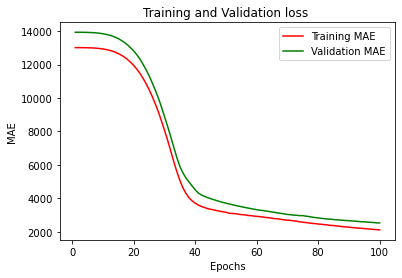

In [50]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

The model is underfit

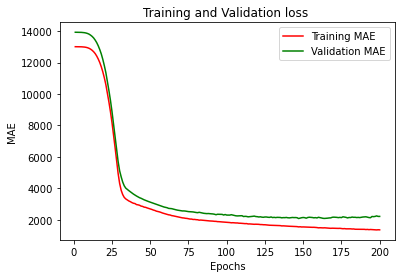

In [51]:
network = build_model('relu')
history = network.fit(train_data, train_labels, epochs=200, batch_size=1, 
                      verbose=0, validation_data=(val_data, val_labels))

epochs = range(1,201)

train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

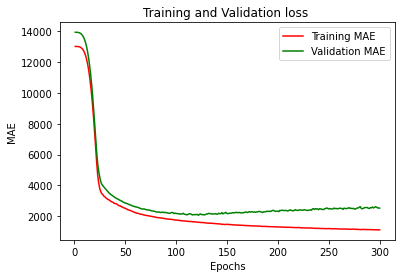

In [52]:
network = build_model('relu')
history = network.fit(train_data, train_labels, epochs=300, batch_size=1, 
                      verbose=0, validation_data=(val_data, val_labels))

epochs = range(1,301)

train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

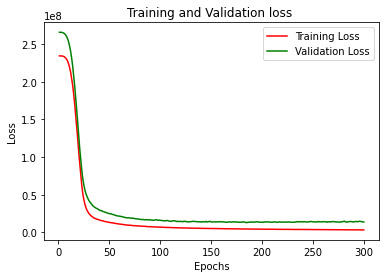

In [53]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

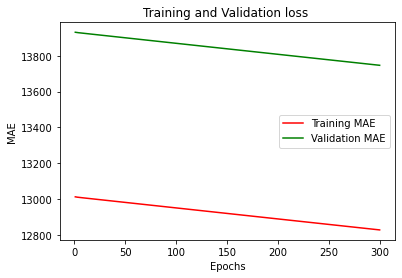

In [54]:
network = build_model('tanh')
history = network.fit(train_data, train_labels, epochs=300, batch_size=1, 
                      verbose=0, validation_data=(val_data, val_labels))

epochs = range(1,301)

train_mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, train_mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'g', label='Validation MAE')
plt.title('Training and Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

<h1>final training</h1>

In [55]:
x = np.concatenate((train_data, val_data), axis=0)
y = np.concatenate((train_labels, val_labels), axis=0)

In [56]:
x.shape

(144, 48)

In [57]:
network = build_model('relu')
network.fit(x, y, epochs=260, batch_size=1, verbose=0)
test_mse_score, test_mae_score  =network.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 0s/step - loss: 6104687.0000 - mae: 1815.6757


In [58]:
network.predict(test_data)

array([[ 6673.3047],
       [13379.175 ],
       [24225.312 ],
       [ 6843.4883],
       [10115.041 ],
       [15928.587 ],
       [19892.057 ],
       [10184.684 ],
       [ 9727.755 ],
       [ 9197.23  ],
       [ 8595.372 ],
       [12987.728 ],
       [41266.547 ],
       [19219.664 ],
       [ 6373.1367],
       [18215.666 ],
       [10755.931 ],
       [ 8460.925 ],
       [16793.42  ],
       [15396.673 ],
       [10889.313 ],
       [20472.04  ],
       [ 8067.4795],
       [ 6567.217 ],
       [13737.972 ],
       [14488.007 ],
       [ 6669.8896],
       [ 6333.8193],
       [13896.817 ],
       [ 8372.215 ],
       [ 8962.388 ],
       [12684.501 ],
       [14139.427 ],
       [19084.959 ],
       [ 6960.413 ],
       [13951.519 ],
       [10395.185 ],
       [ 8305.071 ],
       [ 6523.7246],
       [32495.51  ],
       [15359.233 ],
       [17133.34  ],
       [18032.113 ],
       [ 7736.885 ],
       [ 8533.508 ],
       [ 9285.204 ],
       [28987.361 ],
       [12456

In [59]:
test_labels[0]

6338.0